<h1>Notes on Sharpe Ratio

In finance, the Sharpe ratio (also known as the Sharpe index, the Sharpe measure, and the reward-to-variability ratio) is a way to examine the performance of an investment by adjusting for its risk. The ratio measures the excess return (or risk premium) per unit of deviation in an investment asset or a trading strategy, typically referred to as risk, named after William F. Sharpe.[1]

Sharpe's 1994 revision acknowledged that the basis of comparison should be an applicable benchmark, which changes with time. After this revision, the definition is:

$${\displaystyle S={\frac {E[R-R_{b}]}{\sqrt {\mathrm {var} [R-R_{b}]}}}}$$

<h2>Example

In [50]:
import pickle as pk
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from matplotlib import pyplot as plt

In [90]:
import datetime
start = datetime.datetime(2017, 10, 1)
end = datetime.datetime(2017, 12, 15)

In [98]:
try:
    apple = web.DataReader('GOOGL', 'yahoo', start, end)
    SP500 = web.DataReader('^GSPC','yahoo',start,end)
except:
    print("[NOTEBOOK] couldnt load data from yahoo.. loading locals")
    temp = pk.load(open("apple_sp500.pkl","rb"))
    apple, SP500 = temp['apple'], temp['SP500']

In [99]:
returns = lambda x: (x.Close - x.Open) / x.Open
apple['returns'], SP500['returns']  = returns(apple), returns(SP500)

For an example of calculating the more commonly used ex-post Sharpe ratio - which uses realized rather than expected returns - based on the contemporary definition, consider the following table of daily returns.

In [100]:
example_df = pd.DataFrame({'asset_returns':returns(apple),'benchmark_returns':returns(SP500),'excess_return':returns(apple) - returns(SP500)})
example_df.shape

(54, 3)

We assume that the asset is something like a large-cap U.S. equity fund which would logically be benchmarked against the S&P 500. The mean of the excess returns is 0.00226 and the (sample) standard deviation is 0.01079, so the Sharpe ratio is 0.00226/0.01079, or 0.2102"

In [101]:
np.mean(example_df.excess_return), np.std(example_df.excess_return,ddof=1)

(0.00019446525334508626, 0.0075748364608381365)

In [102]:
sharpe_ratio = np.mean(example_df.excess_return) / np.std(example_df.excess_return,ddof=1)
sharpe_ratio

0.0256725348923994

the strategy analyized is daily returns, that is buy at open and sell at close, let's examine it

Text(0.5, 1.0, 'excess returns')

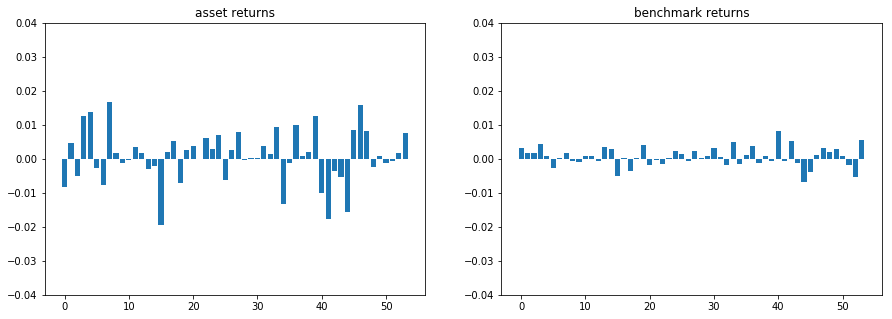

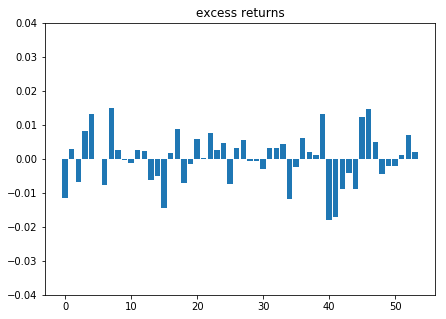

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(range(len(example_df.asset_returns)), example_df.asset_returns)
plt.ylim(-0.04,0.04)
plt.title("asset returns")
plt.subplot(1,2,2)
plt.bar(range(len(example_df.benchmark_returns)), example_df.benchmark_returns)
plt.ylim(-0.04,0.04)
plt.title("benchmark returns")
plt.figure(figsize=(7,5))
plt.bar(range(len(example_df.excess_return)), example_df.excess_return)
plt.ylim(-0.04,0.04)
plt.title("excess returns")

<h1>Explore competition evaluation metric</h1>

In this competition, you must predict a signed confidence value, ŷ ti∈[−1,1] , which is multiplied by the market-adjusted return of a given assetCode over a ten day window. If you expect a stock to have a large positive return--compared to the broad market--over the next ten days, you might assign it a large, positive confidenceValue (near 1.0). If you expect a stock to have a negative return, you might assign it a large, negative confidenceValue (near -1.0). If unsure, you might assign it a value near zero.

For each day in the evaluation time period, we calculate:

$$xt=∑iŷ tirtiuti$$


where rti is the 10-day market-adjusted leading return for day t for instrument i, and uti is a 0/1 universe variable (see the data description for details) that controls whether a particular asset is included in scoring on a particular day.

Your submission score is then calculated as the mean divided by the standard deviation of your daily xt values:
score=x¯tσ(xt).
If the standard deviation of predictions is 0, the score is defined as 0.